In [ ]:
from __future__ import print_function, division
from builtins import range, input
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

Using TensorFlow backend.


In [ ]:
!pip install kaggle

In [ ]:
IMAGE_SIZE = [100, 100]
epochs = 5
batch_size = 32

In [ ]:
! mkdir .kaggle

In [ ]:
import json
token = {"username":"sorabhsnghal","key":"33b22fdc84cffa77f5d5b1f54ce5572c"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list


ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
harvardlil/caselaw-dataset-illinois                            Caselaw Dataset (Illinois)                          929MB  2018-12-04 21:22:53            427  
stefanoleone992/fifa-20-complete-player-dataset                FIFA 20 complete player dataset                      15MB  2019-09-26 20:19:33           5234  
mkechinov/ecommerce-behavior-data-from-multi-category-store    eCommerce behavior data from multi category store     4GB  2019-12-09 20:43:39           1255  
jeffgallini/college-football-team-stats-2019                   College Football Team Stats 2019                     32KB  2020-01-15 16:59:40            688  
unanimad/screen-actors-guild-awards           

In [ ]:
!kaggle datasets download -d moltean/fruits

100% 734M/734M [00:03<00:00, 193MB/s]



In [ ]:
! unzip '/content/{/content}/datasets/moltean/fruits/fruits.zip'

In [ ]:
train_path = '/content/fruits-360_dataset/fruits-360/Training'
valid_path = '/content/fruits-360_dataset/fruits-360/Test'

In [ ]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [ ]:
folders = glob(train_path + '/*')

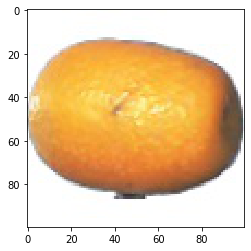

In [ ]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

# our layers - you can add more if you want
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()





58892288/58889256 [==============================] - 1s 0us/step






Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
__________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['mse']
)



# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 20622 images belonging to 120 classes.
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Dates': 35, 'Eggplant': 36, 'Ginger Root': 37, 'Granadilla': 38, 'Grape Blue': 39, 'Grape Pink': 40, 'Grape White': 41, 'Grape White 2': 42, 'Grape White 3': 43, 'Grape White 4': 44, 'Grapefruit Pink': 45, 'Grapefruit White': 46, 'Guava': 47, 'Hazelnut': 

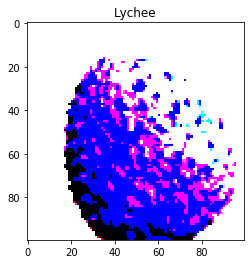

Found 60498 images belonging to 120 classes.
Found 20622 images belonging to 120 classes.


In [ ]:
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

# should be a strangely colored image (due to VGG weights being BGR)
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break


# create generators
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

In [ ]:
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=50,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
1890/1890 [==============================] - 246s 130ms/step - loss: 10.9698 - acc: 0.3095 - val_loss: 9.9009 - val_acc: 0.3722
Epoch 2/5
1890/1890 [==============================] - 229s 121ms/step - loss: 8.9321 - acc: 0.4392 - val_loss: 8.4180 - val_acc: 0.4684
Epoch 3/5
1890/1890 [==============================] - 225s 119ms/step - loss: 8.3193 - acc: 0.4813 - val_loss: 8.4400 - val_acc: 0.4685
Epoch 4/5
1890/1890 [==============================] - 227s 120ms/step - loss: 8.1618 - acc: 0.4915 - val_loss: 8.1565 - val_acc: 0.4880
Epoch 5/5
1890/1890 [==============================] - 224s 118ms/step - loss: 8.0246 - acc: 0.5005 - val_loss: 7.9542 - val_acc: 0.4959


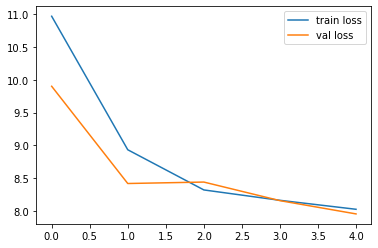

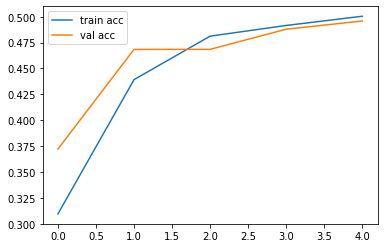

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()

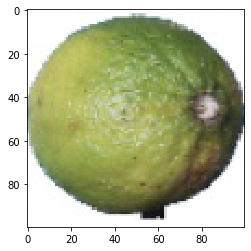

In [ ]:
plt.imshow(image.load_img(image_files[1000]))
plt.show()

In [ ]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm


cm = get_confusion_matrix(train_path, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 60498
Found 60498 images belonging to 120 classes.
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
[[  0   0   2 ...   7   0   0]
 [  0   0   1 ...   1   0   0]
 [  0   0 329 ...   0   0   4]
 ...
 [  0   0   0 ...  80   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 734]]
Generating confusion matrix 20622
Found 20622 images belonging to 120 classes.
50
100
150
200
250
300
[[  0   0   4 ...   3   0   0]
 [  0   0   1 ...   0   0   0]
 [  0   0  86 ...   0   0   3]
 ...
 [  0   0   0 ...  18   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 246]]


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x7F0988E30E48>


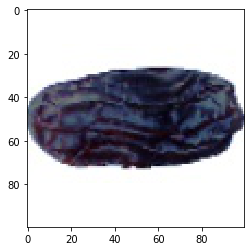

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow

img = Image.open(r"/content/fruits-360_dataset/fruits-360/Test/Dates/100_100.jpg")
print(img)
img.show()
imshow(np.asarray(img))

# new_width = 100
# new_height = 100
# img=img.resize((new_width,new_height),Image.ANTIALIAS)
# img = np.asarray(img)
# img=img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
# plt.imshow(image.load_img(img))
# model.predict(img)

In [ ]:
inputt = np.asarray(img)
print(inputt.shape)
shapee = [1] + list(inputt.shape)
inputt = inputt.reshape(shapee)
print(inputt.shape)

(100, 100, 3)
(1, 100, 100, 3)


In [ ]:
print((model.predict(inputt)))
np.argmax(model.predict(inputt))

[[0.0000000e+00 0.0000000e+00 2.9444779e-35 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1156403e-24
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  6.6658546e-04 0.0000000e+00 2.5832503e-14 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000

119

In [ ]:
class_index_dict = dict(test_gen.class_indices)

In [ ]:
print(class_index_dict)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Dates': 35, 'Eggplant': 36, 'Ginger Root': 37, 'Granadilla': 38, 'Grape Blue': 39, 'Grape Pink': 40, 'Grape White': 41, 'Grape White 2': 42, 'Grape White 3': 43, 'Grape White 4': 44, 'Grapefruit Pink': 45, 'Grapefruit White': 46, 'Guava': 47, 'Hazelnut': 48, 'Huckleberry': 49, 'Kaki': 50, 'Kiwi': 51

In [ ]:
class_index_dict = {value:key for key, value in class_index_dict.items()}


In [ ]:
class_index_dict[np.argmax(model.predict(inputt))]

'Walnut'

In [ ]:
def fruit_name(address):